# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
#(Não funciona, então usarei o seaborn)from sklearn.metrics import plot_confusion_matrix

# Carregar a base de dados original
csv_file_path = 'demo01_modificado.csv'
df = pd.read_csv(csv_file_path)

In [9]:
# Suponha que 'target' seja o nome da variável resposta (ajuste conforme necessário)
# Separar variáveis explicativas (X) e variável resposta (y)
X = df.drop('mau', axis=1)  # Variáveis explicativas
y = df['mau']  # Variável resposta

# Dividir a base de dados em conjuntos de treinamento e validação (70% treino, 30% validação)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar o tamanho das divisões para confirmação
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_valid.shape[0]} amostras")

Tamanho do conjunto de treinamento: 11655 amostras
Tamanho do conjunto de validação: 4995 amostras


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
# Criar o objeto do classificador de árvore de decisão
decision_tree = DecisionTreeClassifier(random_state=42)

# Ajustar o classificador com os dados de treinamento
decision_tree.fit(X_train, y_train)

# Exibir as características do classificador treinado
print("Parâmetros do classificador de árvore de decisão:")
print(decision_tree.get_params())

Parâmetros do classificador de árvore de decisão:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [19]:
# Fazer previsões no conjunto de validação
y_pred = decision_tree.predict(X_valid)

# Avaliar o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_valid, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_valid, y_pred))

Matriz de Confusão:
[[4813   74]
 [  80   28]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      4887
        True       0.27      0.26      0.27       108

    accuracy                           0.97      4995
   macro avg       0.63      0.62      0.63      4995
weighted avg       0.97      0.97      0.97      4995



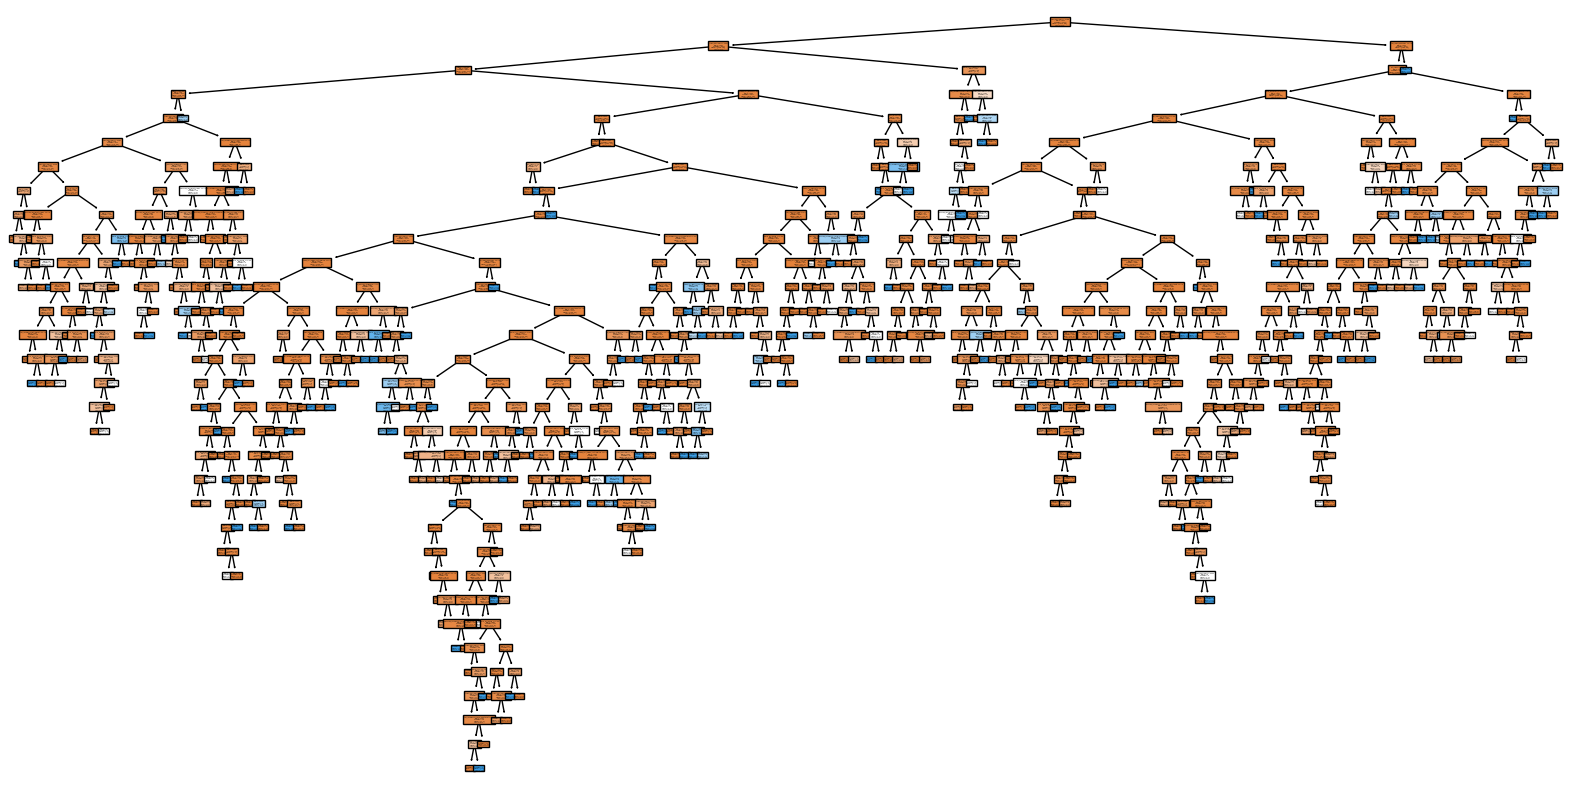

In [38]:
# Configurar o tamanho da figura e visualizar a árvore de decisão
plt.figure(figsize=(20, 10))

plot_tree(decision_tree, 
          feature_names=X_train.columns, 
          class_names=['False', 'True'], 
          filled=True)

# Exibir a árvore
plt.show()

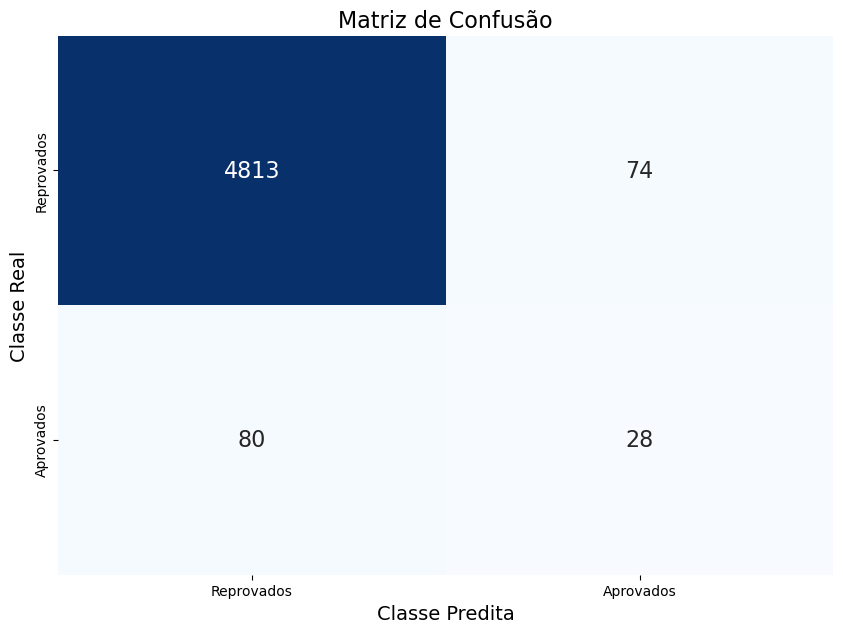

In [62]:
# Fazer previsões no conjunto de validação
y_pred = decision_tree.predict(X_valid)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_valid, y_pred)

# Criar um DataFrame para a matriz de confusão com rótulos personalizados
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Reprovados', 'Aprovados'], 
                              columns=['Reprovados', 'Aprovados'])

# Configurar o tamanho da figura
plt.figure(figsize=(10, 7))

# Criar o mapa de calor da matriz de confusão
sns.heatmap(conf_matrix_df, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar=False, 
            annot_kws={"size": 16},
            xticklabels=['Reprovados', 'Aprovados'], 
            yticklabels=['Reprovados', 'Aprovados'])

# Adicionar títulos e rótulos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Classe Predita', fontsize=14)
plt.ylabel('Classe Real', fontsize=14)

# Exibir a matriz de confusão
plt.show()

In [66]:
# Fazer previsões no conjunto de treinamento
y_train_pred = decision_tree.predict(X_train)

# Calcular a acurácia
accuracy_train = accuracy_score(y_train, y_train_pred)

# Exibir a acurácia
print(f'Acurácia na base de treinamento: {accuracy_train:.4f}')

Acurácia na base de treinamento: 0.9912


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [70]:
# Fazer previsões no conjunto de validação
y_valid_pred = decision_tree.predict(X_valid)

# Exibir as primeiras previsões para verificação
print("Primeiras previsões no conjunto de validação:")
print(y_valid_pred[:10])  # Mostra as primeiras 10 previsões

Primeiras previsões no conjunto de validação:
[False False False False False False False False False False]


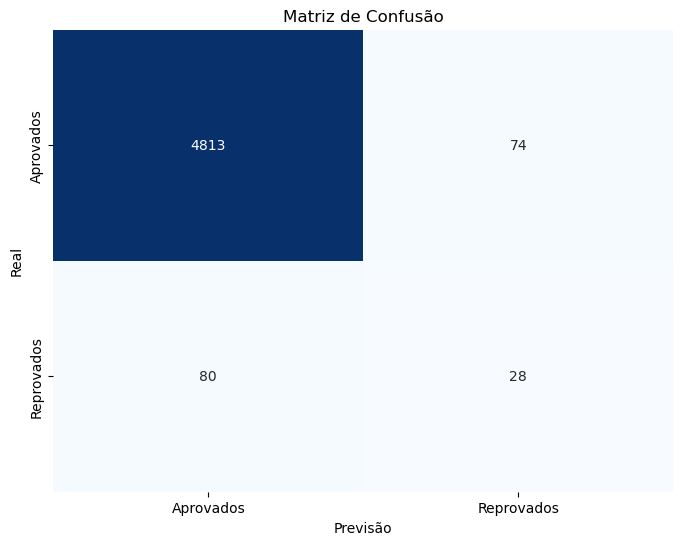

In [72]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_valid, y_valid_pred)

# Criar um DataFrame para a matriz de confusão
cm_df = pd.DataFrame(cm, index=['Aprovados', 'Reprovados'], columns=['Aprovados', 'Reprovados'])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Aprovados', 'Reprovados'], 
            yticklabels=['Aprovados', 'Reprovados'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [74]:
# Calcular a acurácia na base de validação
accuracy_valid = accuracy_score(y_valid, y_valid_pred)

# Exibir a acurácia na base de validação
print(f'Acurácia na base de treinamento: {accuracy_train:.4f}')
print(f'Acurácia na base de validação: {accuracy_valid:.4f}')

# Comparar acurácia
if accuracy_valid > accuracy_train:
    print('Acurácia na base de validação é maior que na base de treinamento.')
elif accuracy_valid < accuracy_train:
    print('Acurácia na base de validação é menor que na base de treinamento.')
else:
    print('Acurácia na base de validação é igual à base de treinamento.')

Acurácia na base de treinamento: 0.9912
Acurácia na base de validação: 0.9692
Acurácia na base de validação é menor que na base de treinamento.


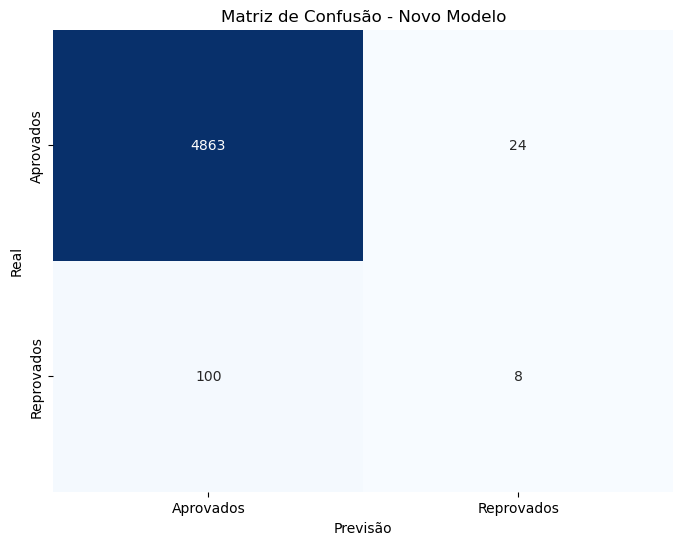

Acurácia na base de validação com o novo modelo: 0.9752
Proporção de proponentes classificados como "maus": 0.0741


In [76]:
# Treinar uma nova árvore de decisão com os parâmetros especificados
new_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
new_decision_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_valid_pred_new = new_decision_tree.predict(X_valid)

# Calcular a matriz de confusão
cm_new = confusion_matrix(y_valid, y_valid_pred_new)
cm_df_new = pd.DataFrame(cm_new, index=['Aprovados', 'Reprovados'], columns=['Aprovados', 'Reprovados'])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_new, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Aprovados', 'Reprovados'], 
            yticklabels=['Aprovados', 'Reprovados'])
plt.title('Matriz de Confusão - Novo Modelo')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# Calcular a acurácia na base de validação
accuracy_valid_new = accuracy_score(y_valid, y_valid_pred_new)

# Exibir a acurácia na base de validação
print(f'Acurácia na base de validação com o novo modelo: {accuracy_valid_new:.4f}')

# Calcular a proporção de proponentes classificados como 'maus'
# Aqui, 'proponentes' são aqueles classificados como 'Aprovados' (ou seja, '0' na variável resposta)
proportion_of_mau = cm_new[1, 1] / cm_new[1].sum()

# Exibir a proporção de proponentes classificados como 'maus'
print(f'Proporção de proponentes classificados como "maus": {proportion_of_mau:.4f}')

In [78]:
# Criar um vetor de previsões onde todos os contratos são classificados como 'bons' (ou seja, False para a variável mau)
y_pred_all_good = [False] * len(y_valid)

# Calcular a acurácia dessas previsões
accuracy_all_good = accuracy_score(y_valid, y_pred_all_good)

# Exibir a acurácia classificando todos os contratos como 'bons'
print(f'Acurácia ao classificar todos os contratos como "bons": {accuracy_all_good:.4f}')

Acurácia ao classificar todos os contratos como "bons": 0.9784
